In [44]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [45]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [46]:
import os
from ast import literal_eval
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from SSMuLA.fitness_process_vis import parse_lib_stat
from SSMuLA.de_simulations import DE_COLORS, DE_TYPES, DE_LEGEND_MAP
from SSMuLA.vis import PRESENTATION_PALETTE_SATURATE, LIB_COLORS
from SSMuLA.zs_analysis import (
    ZS_OPTS,
    ZS_COMB_OPTS,
    ZS_OPTS_LEGEND,
)

%matplotlib inline

In [47]:
N_SAMPLE_LIST = [24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
TOTAL_N_LIST = [n + 96 for n in N_SAMPLE_LIST]

In [48]:
lib_stat = parse_lib_stat(
    lib_csv_path="results/fitness_distribution/max/all_lib_stats.csv", n_mut_cuttoff=0
)
lib_stat

,lib,n_site,numb_measured,percent_measured,numb_active,percent_active,active_fit_min,parent_fit,parent_rank,mean,...,scale,peaks,peak_kde,percentiles,pdf_values,parent_rank_percent,Q1,Q2,Q3,numb_kde_peak
0,DHFR,3.0,8000.0,100.000000,854.0,10.675000,0.158614,0.231325,602.0,0.157945,...,1.737006e-03,"[0.1275662158236592, 0.5084256342965795, 0.606...","[18.95715826406059, 0.17704519880582167, 0.098...","[0.1151661417338432, 0.1212571134074551, 0.122...","[15.199742695395578, 15.667091596432273, 16.11...",0.075250,0.125979,0.127567,0.129802,7
3,ParD2,3.0,7882.0,98.525000,6533.0,82.885055,0.000087,0.973896,12.0,0.228092,...,1.099060e-01,"[0.03337870027347259, 0.6106664209434821, 0.85...","[2.870133679609529, 0.40012326949250876, 0.421...","[-0.2192609576095971, -0.11180451121954202, -0...","[0.026974121384613872, 0.028121215058096317, 0...",0.001522,0.023743,0.112118,0.374642,3
6,ParD3,3.0,7882.0,98.525000,7248.0,91.956356,0.000485,0.982799,7.0,0.321921,...,1.567318e-01,"[0.12255350949782506, 0.2818697911295817, 0.89...","[1.5849621685610578, 1.5168268815479706, 0.556...","[-0.2057345859857947, -0.0879267691331092, -0....","[0.01869666257662742, 0.01949003646085834, 0.0...",0.000888,0.112217,0.276349,0.470212,3
9,GB1,4.0,149361.0,93.350625,34545.0,23.128528,0.001141,0.114130,3644.0,0.009189,...,2.786774e-04,"[0.001001001001001001, 0.15015015015015015, 0....","[84.94812751924495, 0.14711297529110418, 0.091...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[84.45520645025827, 84.94812751924495, 80.8935...",0.024397,0.000156,0.000386,0.001026,33
12,T7,3.0,6725.0,84.062500,234.0,3.479554,0.176534,0.288006,163.0,0.016500,...,3.213795e-20,"[0.12212212212212212, 0.22022022022022023, 0.2...","[0.1355385385042058, 0.10759849737430795, 0.09...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[25.89058161801743, 25.83678275907177, 25.6612...",0.024238,0.000000,0.000000,0.000000,11
15,TEV,4.0,159132.0,99.457500,18262.0,11.476007,0.035601,0.295036,665.0,-0.012509,...,1.890048e-02,"[-0.7917824701915064, -0.7605090595208127, -0....","[0.0036245994071766735, 0.0021495792852726805,...","[-0.8377727800013499, -0.26246975122161975, -0...","[0.13783458085674552, 0.1361875808265587, 0.12...",0.004179,-0.030314,-0.011234,0.008629,27
18,TrpB3A,3.0,7971.0,99.637500,59.0,0.740183,0.097444,1.000000,1.0,-0.039231,...,2.442504e-02,"[-0.3944951616078841, -0.3170232081852239, -0....","[0.005954476272084834, 0.020369915569709816, 0...","[-0.5794792136579096, -0.159409524561979, -0.1...","[0.005958068940422161, 0.005853464928384218, 0...",0.000125,-0.066102,-0.039751,-0.013193,9
21,TrpB3B,3.0,7996.0,99.950000,18.0,0.225113,0.086085,1.000000,1.0,-0.055223,...,1.793460e-02,"[-0.3315353103440577, -0.25764490240877025, -0...","[0.00787295674657887, 0.017643469342674266, 0....","[-0.5064595413745341, -0.14947773198508532, -0...","[0.00789062638682396, 0.007669391706426372, 0....",0.000125,-0.074532,-0.055559,-0.036157,8
24,TrpB3C,3.0,7994.0,99.925000,35.0,0.437828,0.207105,1.000000,1.0,-0.073327,...,4.350006e-02,"[-0.7129431024521451, -0.676881142400521, -0.4...","[0.0036129353359320897, 0.003617641013231226, ...","[-0.8012949045786242, -0.3009295839772114, -0....","[0.0035276345242041393, 0.003499097774177849, ...",0.000125,-0.120727,-0.073272,-0.026945,8
27,TrpB3D,3.0,7763.0,97.037500,719.0,9.261883,0.078985,0.820029,10.0,0.018834,...,2.078814e-02,"[-0.4327437550162602, -0.3044598574343214, 0.0...","[0.007988036362784934, 0.024487960087067218, 1...","[-0.4399507155545714, -0.11762175754299561, -0...","[0.007441392159327368, 0.007659122367135711, 0...",0.001288,-0.014157,0.005591,0.030403,13


In [49]:
mlde_all = pd.read_csv("results/mlde/all_df_comb_onehot_2.csv")
de_all = pd.read_csv("results/de/DE-active/scale2max/all_landscape_de_summary.csv")

In [50]:
# mlde_new1 = pd.read_csv("/disk2/fli/SSMuLA/results/mlde_3/vis/all_df.csv")
# mlde_new1

In [51]:
# mlde_new2 = pd.read_csv("/disk2/fli/SSMuLA/results/mlde_hm2zs_3/vis/all_df.csv")
# mlde_new2

In [52]:
# mlde_new3 = pd.read_csv("/disk2/fli/SSMuLA/results/mlde_coves/vis/all_df.csv")
# mlde_new3

In [53]:
# mlde_all = pd.concat([mlde_all, mlde_new1, mlde_new2, mlde_new3], axis=0)
# mlde_all.to_csv("results/mlde/all_df_comb_onehot_2.csv", index=False)
# mlde_all

In [54]:
mlde_all[(mlde_all["n_sample"] == 384) & (mlde_all["n_top"] == 96) & (mlde_all["zs"] == "none") & (mlde_all["n_mut_cutoff"] == "all")].rep.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [55]:
mlde_all[(mlde_all["n_sample"] == 96) & (mlde_all["n_top"] == 96) & (mlde_all["zs"] == "none") & (mlde_all["n_mut_cutoff"] == "all")].rep.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [84]:
active_cutoff = 1
nonactive_lib_list = lib_stat[(lib_stat["percent_active"]<active_cutoff)]["lib"].tolist() # & (lib_stat["percent_measured"]>90)
nonactive_lib_list

['TrpB3A', 'TrpB3B', 'TrpB3C', 'TrpB3H']

In [85]:
def get_mlde_avg_df(mlde_all, n_top, n_mut_cutoff, zs, nonactive_lib_list):
    avg_mlde = mlde_all[
        (mlde_all["lib"].isin(nonactive_lib_list))
        & (mlde_all["zs"] == zs)
        & (mlde_all["n_top"] == n_top)
        & (mlde_all["n_mut_cutoff"] == n_mut_cutoff)
        & (mlde_all["rep"].isin(np.arange(50)))
    ][["n_sample", "top_maxes", "if_truemaxs"]].groupby("n_sample").agg(["mean", "std"]).reset_index()
    avg_mlde.columns = ['{}_{}'.format(i, j) for i, j in avg_mlde.columns]
    avg_mlde = avg_mlde.rename(columns={'n_sample_': 'n_sample'})
    return avg_mlde

In [86]:
FTLIB_FRAC_LIST = [0.125, 0.25, 0.5, 1]

In [87]:
# ft only 12.5
def get_mlde_avg_sdf(mlde_all, n_top, n_mut_cutoff, zs, nonactive_lib_list, ft_frac = 0.125):
    slice_mlde = mlde_all[
        (mlde_all["lib"].isin(nonactive_lib_list))
        & (mlde_all["zs"].isin([zs]))
        & (mlde_all["n_top"] == n_top)
        & (mlde_all["n_mut_cutoff"] == n_mut_cutoff)
        & (mlde_all["rep"].isin(np.arange(50)))
    ]
    
    if zs != "none":
        lib_dfs = []
        for lib in nonactive_lib_list:
            lib_df = slice_mlde[slice_mlde["lib"] == lib].copy()
            
            print(lib)

            lib_df["ft_lib_size"] = lib_df["ft_lib"].map(
                {
                    numb: frac
                    for numb, frac in zip(
                        sorted(lib_df["ft_lib"].unique()), FTLIB_FRAC_LIST
                    )
                }
            )

            print({numb: frac
                    for numb, frac in zip(
                        sorted(lib_df["ft_lib"].unique()), FTLIB_FRAC_LIST
                    )
                })
            lib_dfs.append(lib_df[lib_df["ft_lib_size"] == ft_frac])
        slice_mlde = pd.concat(lib_dfs)

    avg_mlde = slice_mlde[["n_sample", "top_maxes", "if_truemaxs"]].groupby("n_sample").agg(["mean", "std"]).reset_index()
    avg_mlde.columns = ['{}_{}'.format(i, j) for i, j in avg_mlde.columns]
    avg_mlde = avg_mlde.rename(columns={'n_sample_': 'n_sample'}).set_index("n_sample")
    return avg_mlde

In [88]:
ZS_OPTS

['ed_score',
 'Triad_score',
 'ev_score',
 'esm_score',
 'esmif_score',
 'coves_score']

In [89]:
n_top = 96
avg_mlde_df_dict = {}

# just mlde
avg_mlde_df_dict["MLDE"] = get_mlde_avg_sdf(
    mlde_all, n_top, n_mut_cutoff="all", zs="none", nonactive_lib_list=nonactive_lib_list, ft_frac=0.125
)
avg_mlde_df_dict["ftMLDE: Hamming distance"] = get_mlde_avg_sdf(
    mlde_all, n_top, n_mut_cutoff="double", zs="none", nonactive_lib_list=nonactive_lib_list, ft_frac=0.125
)

for zs in ZS_OPTS[1:]:
    avg_mlde_df_dict[f"ftMLDE: {ZS_OPTS_LEGEND[zs]}"] = get_mlde_avg_sdf(
        mlde_all, n_top, n_mut_cutoff="all", zs=zs, nonactive_lib_list=nonactive_lib_list, ft_frac=0.125
    )

TrpB3A
{1000: 0.125, 2000: 0.25, 4000: 0.5}
TrpB3B
{1000: 0.125, 2000: 0.25, 4000: 0.5}
TrpB3C
{1000: 0.125, 2000: 0.25, 4000: 0.5}
TrpB3H
{1000: 0.125, 2000: 0.25, 4000: 0.5}
TrpB3A
{1000: 0.125, 2000: 0.25, 4000: 0.5}
TrpB3B
{1000: 0.125, 2000: 0.25, 4000: 0.5}
TrpB3C
{1000: 0.125, 2000: 0.25, 4000: 0.5}
TrpB3H
{1000: 0.125, 2000: 0.25, 4000: 0.5}
TrpB3A
{1000: 0.125, 2000: 0.25, 4000: 0.5}
TrpB3B
{1000: 0.125, 2000: 0.25, 4000: 0.5}
TrpB3C
{1000: 0.125, 2000: 0.25, 4000: 0.5}
TrpB3H
{1000: 0.125, 2000: 0.25, 4000: 0.5}
TrpB3A
{1000: 0.125, 2000: 0.25, 4000: 0.5}
TrpB3B
{1000: 0.125, 2000: 0.25, 4000: 0.5}
TrpB3C
{1000: 0.125, 2000: 0.25, 4000: 0.5}
TrpB3H
{1000: 0.125, 2000: 0.25, 4000: 0.5}
TrpB3A
{1000: 0.125, 2000: 0.25, 4000: 0.5}
TrpB3B
{1000: 0.125, 2000: 0.25, 4000: 0.5}
TrpB3C
{1000: 0.125, 2000: 0.25, 4000: 0.5}
TrpB3H
{1000: 0.125, 2000: 0.25, 4000: 0.5}


In [90]:
de_avg = (
    de_all[de_all["lib"].isin(nonactive_lib_list)][["de_type", "mean_all", "fraction_max"]]
    .groupby("de_type")
    .agg(["mean", "std"])
)
de_avg.columns = ["{}_{}".format(i, j) for i, j in de_avg.columns]
de_avg = de_avg.rename(columns={"de_type_": "de_type"})
de_avg

,mean_all_mean,mean_all_std,fraction_max_mean,fraction_max_std
de_type,,,,
recomb_SSM,0.348707,0.056019,0.167776,0.043318
single_step_DE,0.349596,0.055837,0.176250,0.057893
top96_SSM,0.377089,0.072302,0.236612,0.118772


In [91]:
avg_mlde_df_dict["Average ftMLDE"] = pd.DataFrame(
    np.mean(np.stack(list(avg_mlde_df_dict.values())[1:]), axis=0),
    columns=avg_mlde_df_dict["MLDE"].columns,
    index=N_SAMPLE_LIST,
)

In [92]:
def aggregate_alde_df(
    eq_n: int,
    lib_list: list,
    zs: str = "",
    alde_model: str = "Boosting Ensemble",
    alde_encoding: str = "onehot",
    alde_acq: str = "GREEDY",
    alde_dir: str = "/disk2/fli/alde4ssmula",
) -> pd.DataFrame:

    """
    Aggregate ALDE results for a given list of libraries and equal n.

    Args:
    - eq_n (int): Equal n for the libraries.
    - lib_list (list): List of libraries to aggregate.

    Returns:
    - df (pd.DataFrame): Aggregated ALDE results.
    """

    df = pd.DataFrame(
        columns=[
            "n_sample",
            "top_maxes_mean",
            "top_maxes_std",
            "if_truemaxs_mean",
            "if_truemaxs_std",
        ]
    )

    for n in N_SAMPLE_LIST:

        if zs != "":
            zs_append = f"{zs}_"
            res_append = ""
        else:
            zs_append = ""
            res_append = "_2"

        if eq_n == 1:
            csv_path = f"{alde_dir}/results/{zs_append}all_{str(n)}+96/all_results{res_append}.csv"
            
        else:
            csv_path = f"{alde_dir}/results/{zs_append}{str(eq_n)}eq_{str(int((n+96)/eq_n))}/all_results{res_append}.csv"

        if os.path.exists(csv_path):
            a_df = pd.read_csv(csv_path)

            # Get the max Timestep for each Protein
            max_timesteps = a_df.groupby("Protein")["Timestep"].transform("max")
            # DNN Ensemble
            # Boosting Ensemble
            slice_df = a_df[
                (a_df["Encoding"] == alde_encoding)
                & (a_df["Acquisition"] == alde_acq)
                & (a_df["Model"] == alde_model)
                & (a_df["Protein"].isin(lib_list))
                & (a_df["Timestep"] == max_timesteps)
            ]
            # for each Protein take the max of the timestep

            # print(slice_df)
            df = df._append(
                {
                    "n_sample": n,
                    "top_maxes_mean": slice_df["Mean"].mean(),
                    "top_maxes_std": slice_df["Mean"].std(),
                    "if_truemaxs_mean": slice_df["Frac"].mean(),
                    "if_truemaxs_std": slice_df["Frac"].std(),
                },
                ignore_index=True,
            )
        
        else:
            print(f"File not found: {csv_path}")
            
            df = df._append(
                {
                    "n_sample": n,
                    "top_maxes_mean": np.nan,
                    "top_maxes_std": np.nan,
                    "if_truemaxs_mean": np.nan,
                    "if_truemaxs_std": np.nan,
                },
                ignore_index=True,
            )

    return df.set_index("n_sample")

In [93]:
ZS_OPTS_LEGEND

{'none': 'Random',
 'ed_score': 'Hamming distance',
 'Triad_score': 'Triad',
 'ev_score': 'EVmutation',
 'esm_score': 'ESM',
 'esmif_score': 'ESM-IF',
 'coves_score': 'CoVES',
 'struc-comb_score': 'Triad + ESM-IF',
 'Triad-ev_score': 'Triad + EVmutation',
 'Triad-esm_score': 'Triad + ESM',
 'msanoif-comb_score': 'EVmutation + ESM',
 'two-best_score': 'EVmutation + ESM-IF',
 'msa-comb_score': 'EVmutation + ESM + ESM-IF',
 'structnmsa-comb_score': 'Triad + EVmutation + ESM + ESM-IF'}

In [94]:
for eq_n in [1, 2, 3, 4]:

    avg_mlde_df_dict[f"ALDE x {eq_n}"] = aggregate_alde_df(
        eq_n, nonactive_lib_list, alde_model="Boosting Ensemble"
    )

In [95]:
for zs in ["esmif", "ev", "coves", "ed", "esm", "Triad"]:
    zs_label = ZS_OPTS_LEGEND[zs+"_score"]
    avg_mlde_df_dict[f"{zs_label} ALDE x 4"] = aggregate_alde_df(
        eq_n=4, lib_list = nonactive_lib_list, zs=zs, alde_model="Boosting Ensemble"
    )

In [96]:
for zs in ["esmif", "ev", "coves", "ed", "esm", "Triad"]:
    zs_label = ZS_OPTS_LEGEND[zs+"_score"]
    avg_mlde_df_dict[f"{zs_label} ALDE x 3"] = aggregate_alde_df(
        eq_n=3, lib_list = nonactive_lib_list, zs=zs, alde_model="Boosting Ensemble"
    )

In [97]:
for zs in ["esmif", "ev", "coves", "ed", "esm", "Triad"]:
    zs_label = ZS_OPTS_LEGEND[zs+"_score"]
    avg_mlde_df_dict[f"{zs_label} ALDE x 2"] = aggregate_alde_df(
        eq_n=2, lib_list = nonactive_lib_list, zs=zs, alde_model="Boosting Ensemble"
    )

In [98]:
for zs in ["esmif", "ev", "coves", "ed", "esm", "Triad"]:
    print(zs)
    print(avg_mlde_df_dict[f"{zs_label} ALDE x 2"])

esmif
          top_maxes_mean  top_maxes_std  if_truemaxs_mean  if_truemaxs_std
n_sample                                                                  
24.0            0.426952       0.146293             0.215         0.102470
48.0            0.499831       0.217037             0.280         0.159164
96.0            0.582171       0.182318             0.330         0.080829
192.0           0.599692       0.201106             0.330         0.146515
288.0           0.712419       0.207314             0.465         0.170000
384.0           0.711271       0.220361             0.485         0.226495
480.0           0.775468       0.178391             0.560         0.237767
576.0           0.819104       0.140739             0.615         0.178419
960.0           0.927815       0.070601             0.825         0.121518
1920.0          1.000000       0.000000             1.000         0.000000
ev
          top_maxes_mean  top_maxes_std  if_truemaxs_mean  if_truemaxs_std
n_sample        

In [99]:
list(avg_mlde_df_dict.keys())

['MLDE',
 'ftMLDE: Hamming distance',
 'ftMLDE: Triad',
 'ftMLDE: EVmutation',
 'ftMLDE: ESM',
 'ftMLDE: ESM-IF',
 'ftMLDE: CoVES',
 'Average ftMLDE',
 'ALDE x 1',
 'ALDE x 2',
 'ALDE x 3',
 'ALDE x 4',
 'ESM-IF ALDE x 4',
 'EVmutation ALDE x 4',
 'CoVES ALDE x 4',
 'Hamming distance ALDE x 4',
 'ESM ALDE x 4',
 'Triad ALDE x 4',
 'ESM-IF ALDE x 3',
 'EVmutation ALDE x 3',
 'CoVES ALDE x 3',
 'Hamming distance ALDE x 3',
 'ESM ALDE x 3',
 'Triad ALDE x 3',
 'ESM-IF ALDE x 2',
 'EVmutation ALDE x 2',
 'CoVES ALDE x 2',
 'Hamming distance ALDE x 2',
 'ESM ALDE x 2',
 'Triad ALDE x 2']

In [100]:
avg_mlde_df_dict["MLDE"].columns

Index(['top_maxes_mean', 'top_maxes_std', 'if_truemaxs_mean',
       'if_truemaxs_std'],
      dtype='object')

In [101]:
avg_mlde_df_dict["ALDE x 1"].columns,

(Index(['top_maxes_mean', 'top_maxes_std', 'if_truemaxs_mean',
        'if_truemaxs_std'],
       dtype='object'),)

In [102]:
avg_mlde_df_dict["Average ftALDE x 4"] = pd.DataFrame(
    np.mean(np.stack(list(avg_mlde_df_dict.values())[12:12+6]), axis=0),
    columns=avg_mlde_df_dict["MLDE"].columns,
    index=N_SAMPLE_LIST,
)

In [103]:
len(list(avg_mlde_df_dict.values())[12+6+1:12+6+1+6])

6

In [104]:
avg_mlde_df_dict["Average ftALDE x 3"] = pd.DataFrame(
    np.mean(np.stack(list(avg_mlde_df_dict.values())[12+6+1:12+6+1+6]), axis=0),
    columns=avg_mlde_df_dict["MLDE"].columns,
    index=N_SAMPLE_LIST,
)

In [105]:
len(list(avg_mlde_df_dict.values())[12+6*2+1*2:])

6

In [106]:
avg_mlde_df_dict["Average ftALDE x 2"] = pd.DataFrame(
    np.mean(np.stack(list(avg_mlde_df_dict.values())[12+6*2+1*2:]), axis=0),
    columns=avg_mlde_df_dict["MLDE"].columns,
    index=N_SAMPLE_LIST,
)

In [107]:
avg_mlde_df_dict["Average ftALDE x 2"]

,top_maxes_mean,top_maxes_std,if_truemaxs_mean,if_truemaxs_std
24,0.378871,0.121009,0.186111,0.081522
48,0.421328,0.144413,0.217222,0.097087
96,0.504920,0.164064,0.276389,0.113662
192,0.580750,0.185938,0.321111,0.134708
288,0.656636,0.197513,0.413889,0.162885
384,0.682028,0.216726,0.446389,0.204433
480,0.737363,0.203231,0.507639,0.216969
576,0.765283,0.185608,0.555000,0.202550
960,0.877996,0.129830,0.744583,0.197819
1920,0.984825,0.018539,0.972083,0.033040


In [108]:
avg_mlde_df_dict.keys()

dict_keys(['MLDE', 'ftMLDE: Hamming distance', 'ftMLDE: Triad', 'ftMLDE: EVmutation', 'ftMLDE: ESM', 'ftMLDE: ESM-IF', 'ftMLDE: CoVES', 'Average ftMLDE', 'ALDE x 1', 'ALDE x 2', 'ALDE x 3', 'ALDE x 4', 'ESM-IF ALDE x 4', 'EVmutation ALDE x 4', 'CoVES ALDE x 4', 'Hamming distance ALDE x 4', 'ESM ALDE x 4', 'Triad ALDE x 4', 'ESM-IF ALDE x 3', 'EVmutation ALDE x 3', 'CoVES ALDE x 3', 'Hamming distance ALDE x 3', 'ESM ALDE x 3', 'Triad ALDE x 3', 'ESM-IF ALDE x 2', 'EVmutation ALDE x 2', 'CoVES ALDE x 2', 'Hamming distance ALDE x 2', 'ESM ALDE x 2', 'Triad ALDE x 2', 'Average ftALDE x 4', 'Average ftALDE x 3', 'Average ftALDE x 2'])

In [109]:
import seaborn as sns

In [110]:
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

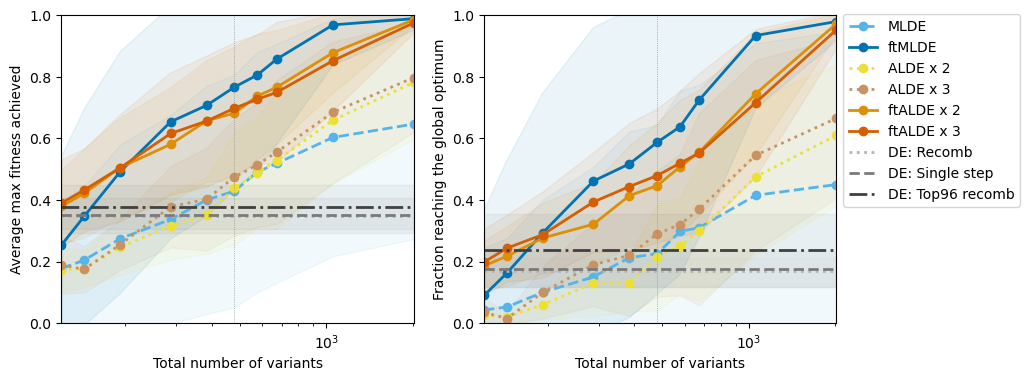

In [112]:
# for avg cross number of samples
n_top = 96
n_corr = 384

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
mlde_color_list = [
    sns.color_palette("colorblind")[9],
    sns.color_palette("colorblind")[0],
    sns.color_palette("colorblind")[8],
    sns.color_palette("colorblind")[5],
    sns.color_palette("colorblind")[1],
    sns.color_palette("colorblind")[3],
    # *sns.color_palette("colorblind")[:]

]
line_styles = ["dashed", "solid", "dotted", "dotted", "solid", "solid"]

for ax, mlde_metric, de_metric, y_label in zip(
    axes,
    ["top_maxes", "if_truemaxs"],
    ["mean_all", "fraction_max"],
    ["Average max fitness achieved", "Fraction reaching the global optimum"],
):

    for i, (mlde_opts) in enumerate(
        [
            "MLDE",
            "Average ftMLDE",
            # "ALDE x 1",
            "ALDE x 2",
            "ALDE x 3",
            # "ALDE x 4",
            "Average ftALDE x 2",
            "Average ftALDE x 3",
            # "Average ftALDE x 4",
        ]
    ):
        mlde_df = avg_mlde_df_dict[mlde_opts]

        ax.plot(
            # mlde_df.index,
            # mlde_df["n_sample"],
            TOTAL_N_LIST,
            mlde_df[f"{mlde_metric}_mean"],
            # label=label_app+mlde_opts,
            label=mlde_opts.replace("Average ", ""),
            marker="o",
            linestyle=line_styles[i],
            linewidth=2,
            # color=PRESENTATION_PALETTE_SATURATE[mlde_color_list[i]],
            color=mlde_color_list[i]
        )
        ax.fill_between(
            # mlde_df.index,
            # mlde_df["n_sample"],
            TOTAL_N_LIST,
            mlde_df[f"{mlde_metric}_mean"] - mlde_df[f"{mlde_metric}_std"],
            mlde_df[f"{mlde_metric}_mean"] + mlde_df[f"{mlde_metric}_std"],
            # color=PRESENTATION_PALETTE_SATURATE[mlde_color_list[i]],
            color=mlde_color_list[i],
            alpha=0.08,
        )

    de_colors = sns.color_palette("Greys", 4)
    de_ls = ["dotted", "dashed", "dashdot"]

    for d, de in enumerate(DE_TYPES):
        ax.axhline(
            de_avg.loc[de, f"{de_metric}_mean"],
            label=f"DE: {DE_LEGEND_MAP[de]}",
            color=de_colors[d+1],
            linestyle=de_ls[d],
            linewidth=2,
        )
        ax.fill_between(
            TOTAL_N_LIST,  # N_SAMPLE_LIST,
            de_avg.loc[de, f"{de_metric}_mean"] - de_avg.loc[de, f"{de_metric}_std"],
            de_avg.loc[de, f"{de_metric}_mean"] + de_avg.loc[de, f"{de_metric}_std"],
            color=de_colors[d+1],
            alpha=0.05,
        )

    # add vline
    ax.axvline(n_corr+n_top, color="gray", linewidth=0.5, linestyle="dotted")

    # ax.set_xlim(N_SAMPLE_LIST[0], N_SAMPLE_LIST[-1])
    ax.set_xlim(TOTAL_N_LIST[0], TOTAL_N_LIST[-1])
    ax.set_ylim(0, 1.0)

    ax.set_xscale("log")
    # ax.set_xlabel("Number of training samples")
    ax.set_xlabel("Total number of variants")
    ax.set_ylabel(y_label)

    if ax == axes[1]:
        ax.legend(loc="upper left", bbox_to_anchor=(1, 1.025))

# fig.suptitle(
#     "(ft)MLDE vs DE Performance Across 10 Landscapes", fontsize=12, fontweight="bold", y=0.95
# )